In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm

font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()

plt.rc("font", family = font_name)

import matplotlib as mlp

## rc is remote control?

mlp.rcParams["axes.unicode_minus"] = False

##Params: Parameters


# TOPIC 3: UNMARRIED RATIO AND DEBT(ACTUAL), DEBT AND BR, DEBT HOUSEHOLDS RATIO AND BR

In [63]:


mar_s = pd.read_csv("C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-18\\jsy\\m_status_3.csv", index_col = [0, 1], header=[0, 1])


In [64]:
mar_s

1985                        1990                        1995  \
                 계       미혼        비율        계       미혼        비율        계   
전체 20~24세  4245090  3548826  0.835984  4396309  3903892  0.887993  4304378   
   25~29세  4070408  1404122  0.344959  4333500  1718045  0.396457  4137913   
   30~34세  3115238   214469  0.068845  4207714   407860  0.096931  4230239   
   35~39세  2581181    55653  0.021561  3201210    99612  0.031117  4133864   

                                 2000  ...      2005     2010           \
                미혼        비율        계  ...        비율        계       미혼   
전체 20~24세  3876203  0.900526  3848186  ...  0.960313  3055420  2979443   
   25~29세  1947586  0.470669  4096978  ...  0.705731  3538949  2743190   
   30~34세   557047  0.131682  4093228  ...  0.302206  3695348  1469486   
   35~39세   206369  0.049922  4186953  ...  0.130108  4099147   806770   

                        2015                        2020                     
                 비율        계       미혼        비율        계       미혼        비율  
전체 20~24세  0.975134  3380576  3309507  0.978977  3193316  3148848  0.986075  
   25~29세  0.775143  3024909  2539393  0.839494  3423231  2991167  0.873785  
   30~34세  0.397658  3607875  1693003  0.469252  3032832  1710284  0.563923  
   35~39세  0.196814  3774150   988968  0.262037  3594213  1104943  0.307423  

[4 rows x 24 columns]

In [65]:
mar_fi = mar_s.loc[:, (slice(None), '비율')]

In [66]:

mar_m= mar_fi.T

In [67]:
mar_z= mar_m.loc[:, ('전체', '30~34세')]

In [68]:
mar_d = mar_z.to_frame()

In [69]:
mar_d   ### 30-34세 1985-2020 5년간격으로


전체
           30~34세
1985 비율  0.068845
1990 비율  0.096931
1995 비율  0.131682
2000 비율  0.194924
2005 비율  0.302206
2010 비율  0.397658
2015 비율  0.469252
2020 비율  0.563923

In [70]:
mar_d.to_csv("C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-20\\unmarried_ratio.csv")

In [71]:
## regression line for an estimate

yr = list(range(2012, 2022))
y_values = []

for x in yr:
    y = round(0.0148 * x - 29.437, 2)
    y_values.append(y)

print(y_values)


[0.34, 0.36, 0.37, 0.39, 0.4, 0.41, 0.43, 0.44, 0.46, 0.47]


In [11]:
dfe = pd.DataFrame(y_values, columns = ['unmarried_ratio'])

In [12]:
index_range = range(2012, 2022)
dfe.index= index_range

In [13]:
dfe  # (regression line 으로 2012-2021 미혼율 획득)

unmarried_ratio
2012             0.34
2013             0.36
2014             0.37
2015             0.39
2016             0.40
2017             0.41
2018             0.43
2019             0.44
2020             0.46
2021             0.47

In [14]:
dfe.to_csv("C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-20\\unmarried_ratio12_21.csv")

In [15]:
# Debt under 30

unm_df = pd.read_csv("C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-19\\jsy\\2012-2022_debt_2030.csv", index_col = [0], header = [0, 1])

In [16]:
unm_df.columns= unm_df.columns.droplevel()

#selected_col = unm_df.loc[:, unm_df.columns != '전년대비 증감율']#

In [17]:
unm_df

2012  2013  전년대비 증감율  2014  전년대비 증감율  2015  전년대비 증감율  2016  전년대비 증감율  \
전체      5450  5818       6.8  5994       2.3  6181       2.2  6655       6.4   
30세 미만  1283  1393       8.6  1558      11.2  5323       1.7  1593       6.8   
30-39세  4405  4859      10.3  5235       7.0  7103       1.3  5877       7.6   

        2017  ...  2018  전년대비 증감율  2019  전년대비 증감율   2020  전년대비 증감율   2021  \
전체      7022  ...  7531       6.1  7910      0.05   8256      0.04   8801   
30세 미만  2385  ...  2397       0.2  3197      0.33   3479      0.09   3550   
30-39세  6872  ...  7873      13.8  8915      0.13  10082      0.13  11190   

        전년대비 증감율   2022  전년대비 증감율  
전체           6.6   9170       4.2  
30세 미만       2.1   5014      41.2  
30-39세      11.0  11307       1.1  

[3 rows x 21 columns]

In [18]:
selected_col = unm_df.loc[:, unm_df.columns != '전년대비 증감율']


In [19]:
selected_colf= selected_col.iloc[1:2, :-1]

In [20]:
selected_colf= selected_colf.T

selected_colf

30세 미만
2012    1283
2013    1393
2014    1558
2015    5323
2016    1593
2017    2385
2018    2397
2019    3197
2020    3479
2021    3550

In [21]:
selected_colf.iloc[3, 0] = 1506

In [22]:
selected_colf

30세 미만
2012    1283
2013    1393
2014    1558
2015    1506
2016    1593
2017    2385
2018    2397
2019    3197
2020    3479
2021    3550

In [23]:
print(selected_colf.index)
print(dfe.index)

Index(['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'],
      dtype='object')
RangeIndex(start=2012, stop=2022, step=1)


In [24]:
dfe.index = dfe.index.astype(str)


In [25]:
dfe

unmarried_ratio
2012             0.34
2013             0.36
2014             0.37
2015             0.39
2016             0.40
2017             0.41
2018             0.43
2019             0.44
2020             0.46
2021             0.47

In [26]:
mer_unm_deb= pd.merge(dfe, selected_colf, left_index = True, right_index = True)

In [27]:
mer_unm_deb.to_csv("C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-20\\mer_unm_deb.csv", index = True)


In [28]:
x = selected_colf['30세 미만']
y = dfe['unmarried_ratio']

C:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.8, 'Corr: 0.94')

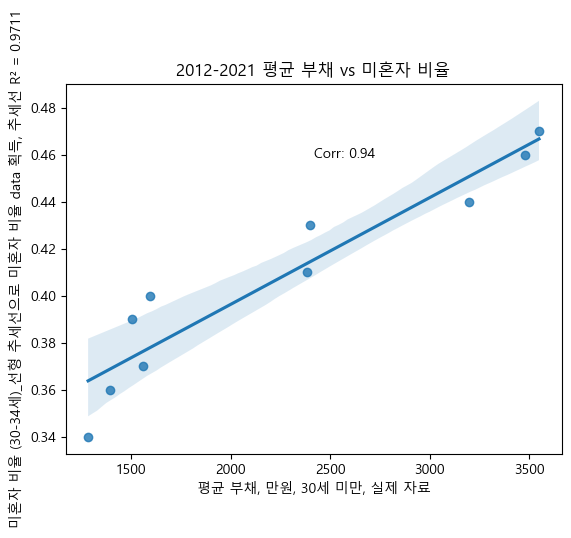

In [29]:
sns.regplot(x, y)
plt.title("2012-2021 평균 부채 vs 미혼자 비율")
plt.xlabel('평균 부채, 만원, 30세 미만, 실제 자료')
plt.ylabel('미혼자 비율 (30-34세)_선형 추세선으로 미혼자 비율 data 획득, 추세선 R² = 0.9711')
corr_coef= np.corrcoef(x, y)[0,1]
plt.gca().annotate(f"Corr: {corr_coef:.2f}", xy=(0.5, 0.8), xycoords=plt.gca().transAxes)


In [30]:
np.corrcoef(x, y)[0,1]

0.9440807492621479

In [31]:
### 2015 년에 갑자기 부채가 높아짐?
## 데이터를 잘못입력함! 문제 없음!
###

In [32]:
mar_d.index = mar_d.index.droplevel(1)

In [33]:
mar_d

전체
        30~34세
1985  0.068845
1990  0.096931
1995  0.131682
2000  0.194924
2005  0.302206
2010  0.397658
2015  0.469252
2020  0.563923

Text(0, 0.5, '미혼자 / 총 합계')

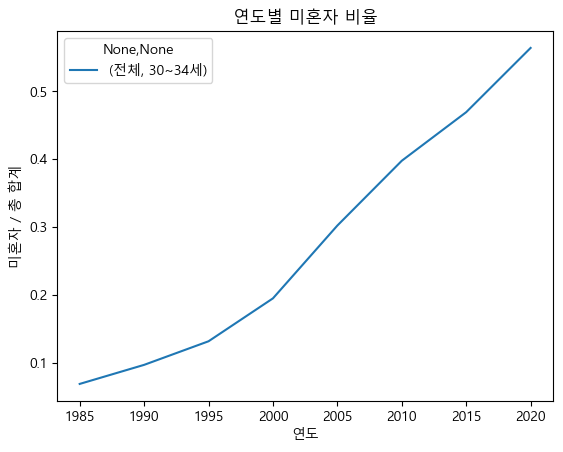

In [34]:
ax = mar_d.plot.line()


ax.set_title('연도별 미혼자 비율')

ax.set_xlabel('연도')
ax.set_ylabel('미혼자 / 총 합계')


In [36]:
mar_q = mar_d

In [37]:
mar_q

mar_q.index = mar_q.index.astype('int64')

In [38]:
mar_q


전체
        30~34세
1985  0.068845
1990  0.096931
1995  0.131682
2000  0.194924
2005  0.302206
2010  0.397658
2015  0.469252
2020  0.563923

In [40]:
df = pd.read_csv("C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-18\\jsy\\br_85_20.csv", index_col = [0], header=[0])


In [41]:
df

합계출산율
1985   1.66
1990   1.57
1995   1.65
2000   1.48
2005   1.09
2010   1.23
2015   1.24
2020   0.84

In [42]:
merged_df = pd.merge(mar_q, df, left_index=True, right_index=True)

merged_df

C:\Users\acorn\AppData\Local\Temp\ipykernel_21188\2178774866.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  merged_df = pd.merge(mar_q, df, left_index=True, right_index=True)


(전체, 30~34세)  합계출산율
1985      0.068845   1.66
1990      0.096931   1.57
1995      0.131682   1.65
2000      0.194924   1.48
2005      0.302206   1.09
2010      0.397658   1.23
2015      0.469252   1.24
2020      0.563923   0.84

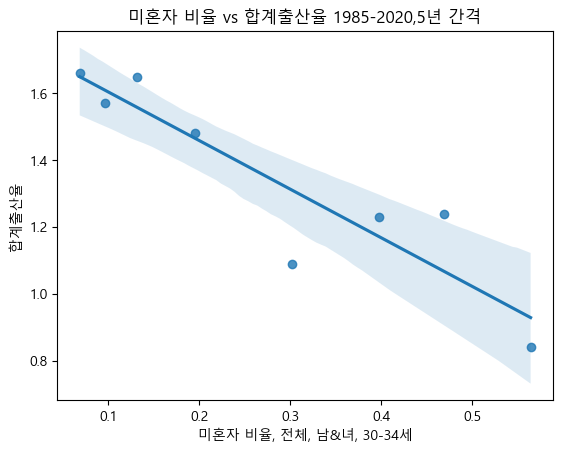

-0.9136741799911685

In [43]:
merged_df
x_col = merged_df[('전체', '30~34세')]
sns.regplot(data=merged_df, x=x_col, y='합계출산율')



# Add a title and axis labels to the plot
plt.title('미혼자 비율 vs 합계출산율 1985-2020,5년 간격')
plt.xlabel('미혼자 비율, 전체, 남&녀, 30-34세')
plt.ylabel('합계출산율')



# Display the plot

plt.show()


np.corrcoef(merged_df[('전체', '30~34세')], merged_df["합계출산율"])[0,1]


In [44]:
mar_q.index


Int64Index([1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], dtype='int64')

In [45]:
df.index

Int64Index([1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], dtype='int64')

In [46]:
mar_q.index = mar_q.index.astype('int64')


In [47]:
import pandas as pd

# Assuming your dataframe is named 'my_dataframe', you can create a CSV file like this:


merged_df.to_csv('C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-19\\merged_df.csv')


Text(0, 0.5, '미혼자 비율')

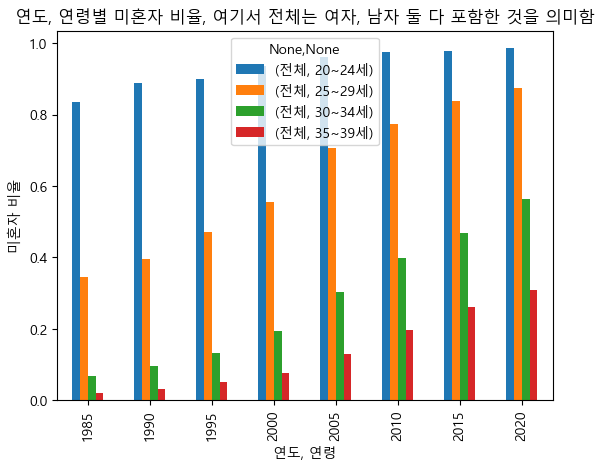

In [48]:
ax = mar_m.plot.bar()
ax.set_xlabel(mar_m.index.name)

ax.set_title('연도, 연령별 미혼자 비율, 여기서 전체는 여자, 남자 둘 다 포함한 것을 의미함')

ax.set_xlabel('연도, 연령')

ax.set_xticklabels(mar_m.index.get_level_values(0))

ax.set_ylabel('미혼자 비율')

### 여기서 전체는 여자, 남자 둘 다 포함한 것을 의미함

In [72]:
df_d = pd.read_csv("C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-19\\jsy\\2012-2022_debt_2030.csv", index_col = [0], header=[ 1])


In [73]:
df_d

2012  2013  전년대비 증감율  2014  전년대비 증감율.1  2015  전년대비 증감율.2  2016  \
전체      5450  5818       6.8  5994         2.3  6181         2.2  6655   
30세 미만  1283  1393       8.6  1558        11.2  5323         1.7  1593   
30-39세  4405  4859      10.3  5235         7.0  7103         1.3  5877   

        전년대비 증감율.3  2017  ...  2018  전년대비 증감율.5  2019  전년대비 증감율.6   2020  \
전체             6.4  7022  ...  7531         6.1  7910        0.05   8256   
30세 미만         6.8  2385  ...  2397         0.2  3197        0.33   3479   
30-39세         7.6  6872  ...  7873        13.8  8915        0.13  10082   

        전년대비 증감율.7   2021  전년대비 증감율.8   2022  전년대비 증감율.9  
전체            0.04   8801         6.6   9170         4.2  
30세 미만        0.09   3550         2.1   5014        41.2  
30-39세        0.13  11190        11.0  11307         1.1  

[3 rows x 21 columns]

In [100]:
#### i used excel instead on csv 

#### this section doesn't work


import pandas as pd

# read the CSV file into a pandas dataframe
df = pd.read_csv('C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-21 - 복사본\\jsy\\04-21\\2012-2021_anal.csv')

# reorganize the columns and rename them
df = df[['시도별', '2012 합계출산율', '2021 합계출산율', '2012 부채 가구 비율', '2021 부채 가구 비율']]
#df.columns = ['시도별', '2012_합계출산율', '2021_합계출산율', '2012_부채_가구_비율', '2021_부채_가구_비율']

# set "시도별" as the index
#df.set_index(['시도별'], inplace=True)

# show the dataframe
print(df)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-21 - 복사본\\jsy\\04-21\\2012-2021_anal.csv'

In [99]:
df1 = df.filter(regex='^시도별')


In [ ]:
df1


In [ ]:
df2 = df.filter(regex='[^시도별]')


In [ ]:

df2


In [ ]:
df1.set_index('시도별', inplace=True)


In [ ]:
df1

In [ ]:
result = pd.concat([df1, df2], axis=1)


In [ ]:
result

In [112]:
#### debt_가구비율_12_21_anal.csv

In [136]:
import pandas as pd

# read in the two csv files
df1 = pd.read_csv('C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-21 - 복사본\\jsy\\04-21\\br_2012-2021.csv')
df2 = pd.read_csv('C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-21 - 복사본\\jsy\\04-21\\debt_가구비율_12_21_anal.csv')



# set '시도별' as the index for each dataframe
df1.set_index('시도별', inplace=True)
df2.set_index('시도별', inplace=True)



# merge the two dataframes on the index
merged_df = pd.merge(df1, df2, left_index=True, right_index=True)

# print the merged dataframe
print(merged_df)
merged_df.info()



       2012 합계출산율  2021 합계출산율  2012 부채 가구 비율  2021 부채 가구 비율
시도별                                                        
서울특별시       1.297       0.626           63.1           63.2
부산광역시       1.135       0.728           60.4           63.3
인천광역시       1.301       0.778           70.3           67.8
대구광역시       1.217       0.785           67.7           62.8
전국          1.297       0.808           64.6           63.6
대전광역시       1.315       0.810           66.8           67.5
전라북도        1.440       0.850           55.9           53.5
경기도         1.355       0.853           72.1           70.3
광주광역시       1.295       0.896           68.1           59.3
경상남도        1.503       0.903           65.5           61.8
울산광역시       1.481       0.940           65.0           61.8
충청북도        1.485       0.949           61.1           54.9
충청남도        1.571       0.963           59.2           59.1
경상북도        1.489       0.966           58.8           54.4
강원도         1.374       0.979           

In [137]:
merged_df['pct_change_br_2012_2021'] = (merged_df['2021 합계출산율'] - merged_df['2012 합계출산율']) / merged_df['2012 합계출산율'] * 100


In [138]:
df1

2012 합계출산율  2021 합계출산율
시도별                            
서울특별시         1.297       0.626
부산광역시         1.135       0.728
인천광역시         1.301       0.778
대구광역시         1.217       0.785
전국            1.297       0.808
대전광역시         1.315       0.810
전라북도          1.440       0.850
경기도           1.355       0.853
광주광역시         1.295       0.896
경상남도          1.503       0.903
울산광역시         1.481       0.940
충청북도          1.485       0.949
제주특별자치도       1.598       0.951
충청남도          1.571       0.963
경상북도          1.489       0.966
강원도           1.374       0.979
전라남도          1.642       1.017

In [139]:
merged_df

2012 합계출산율  2021 합계출산율  2012 부채 가구 비율  2021 부채 가구 비율  \
시도별                                                           
서울특별시       1.297       0.626           63.1           63.2   
부산광역시       1.135       0.728           60.4           63.3   
인천광역시       1.301       0.778           70.3           67.8   
대구광역시       1.217       0.785           67.7           62.8   
전국          1.297       0.808           64.6           63.6   
대전광역시       1.315       0.810           66.8           67.5   
전라북도        1.440       0.850           55.9           53.5   
경기도         1.355       0.853           72.1           70.3   
광주광역시       1.295       0.896           68.1           59.3   
경상남도        1.503       0.903           65.5           61.8   
울산광역시       1.481       0.940           65.0           61.8   
충청북도        1.485       0.949           61.1           54.9   
충청남도        1.571       0.963           59.2           59.1   
경상북도        1.489       0.966           58.8           54.4   
강원도         1.374       0.979           57.3           60.7   
전라남도        1.642       1.017           51.7           56.3   

       pct_change_br_2012_2021  
시도별                             
서울특별시               -51.734773  
부산광역시               -35.859031  
인천광역시               -40.199846  
대구광역시               -35.497124  
전국                  -37.702390  
대전광역시               -38.403042  
전라북도                -40.972222  
경기도                 -37.047970  
광주광역시               -30.810811  
경상남도                -39.920160  
울산광역시               -36.529372  
충청북도                -36.094276  
충청남도                -38.701464  
경상북도                -35.124244  
강원도                 -28.748180  
전라남도                -38.063337

In [140]:
merged_df['pct_change_debt_2012_2021'] = (merged_df['2021 부채 가구 비율'] - merged_df['2012 부채 가구 비율']) / merged_df['2012 부채 가구 비율'] * 100

In [119]:
#merged_df.drop("pct_change_2012_2021", axis = 1, inplace  =True)

KeyError: "['pct_change_2012_2021'] not found in axis"

In [141]:
merged_df

2012 합계출산율  2021 합계출산율  2012 부채 가구 비율  2021 부채 가구 비율  \
시도별                                                           
서울특별시       1.297       0.626           63.1           63.2   
부산광역시       1.135       0.728           60.4           63.3   
인천광역시       1.301       0.778           70.3           67.8   
대구광역시       1.217       0.785           67.7           62.8   
전국          1.297       0.808           64.6           63.6   
대전광역시       1.315       0.810           66.8           67.5   
전라북도        1.440       0.850           55.9           53.5   
경기도         1.355       0.853           72.1           70.3   
광주광역시       1.295       0.896           68.1           59.3   
경상남도        1.503       0.903           65.5           61.8   
울산광역시       1.481       0.940           65.0           61.8   
충청북도        1.485       0.949           61.1           54.9   
충청남도        1.571       0.963           59.2           59.1   
경상북도        1.489       0.966           58.8           54.4   
강원도         1.374       0.979           57.3           60.7   
전라남도        1.642       1.017           51.7           56.3   

       pct_change_br_2012_2021  pct_change_debt_2012_2021  
시도별                                                        
서울특별시               -51.734773                   0.158479  
부산광역시               -35.859031                   4.801325  
인천광역시               -40.199846                  -3.556188  
대구광역시               -35.497124                  -7.237814  
전국                  -37.702390                  -1.547988  
대전광역시               -38.403042                   1.047904  
전라북도                -40.972222                  -4.293381  
경기도                 -37.047970                  -2.496533  
광주광역시               -30.810811                 -12.922173  
경상남도                -39.920160                  -5.648855  
울산광역시               -36.529372                  -4.923077  
충청북도                -36.094276                 -10.147300  
충청남도                -38.701464                  -0.168919  
경상북도                -35.124244                  -7.482993  
강원도                 -28.748180                   5.933682  
전라남도                -38.063337                   8.897485

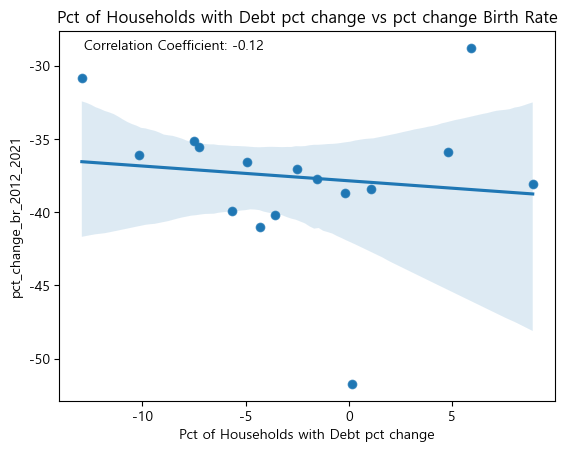

In [164]:


merged_df.plot.scatter(x='pct_change_debt_2012_2021', y='pct_change_br_2012_2021')


import seaborn as sns

ax = sns.regplot(x='pct_change_debt_2012_2021', y='pct_change_br_2012_2021', data=merged_df)
ax.set_title("Pct of Households with Debt pct change vs pct change Birth Rate")
ax.set_xlabel("Pct of Households with Debt pct change")


# Add correlation coefficient
corr = merged_df['pct_change_debt_2012_2021'].corr(merged_df['pct_change_br_2012_2021'])
ax.annotate(f"Correlation Coefficient: {corr:.2f}", xy=(0.05, 0.95), xycoords='axes fraction')

# Show the plot
plt.show()

#### 부채 가구 비율의 



In [143]:
import numpy as np

corr = np.corrcoef(merged_df['pct_change_debt_2012_2021'], merged_df['pct_change_br_2012_2021'])[0, 1]
corr


-0.11978686420407028

In [144]:
import pandas as pd
merged_df['2021 합계출산율'].pct_change(periods = 1)





시도별
서울특별시         NaN
부산광역시    0.162939
인천광역시    0.068681
대구광역시    0.008997
전국       0.029299
대전광역시    0.002475
전라북도     0.049383
경기도      0.003529
광주광역시    0.050410
경상남도     0.007812
울산광역시    0.040975
충청북도     0.009574
충청남도     0.014752
경상북도     0.003115
강원도      0.013458
전라남도     0.038815
Name: 2021 합계출산율, dtype: float64

In [147]:
import pandas as pd

## 
## 12-21중앙값.xlsx
##

# read in the two csv files
med_df = pd.read_excel('C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-21 - 복사본\\jsy\\04-24\\12-21중앙값.xlsx', index_col = 0, header = 0)

med_df

#med_df['pct_change_debt_2012_2021'] = (med_df['2021'] - med_df['2012']) / med_df['2012'] * 100

#med_df['2021']

#print(med_df.columns)

med_df


2012   2021
전국        3050  6,792
서울특별시    5,000  9,000
부산광역시    2,600   6450
대구광역시    2,120  5,700
인천광역시    3,500  7,680
광주광역시    2,050  5,884
대전광역시    3,000  5,800
울산광역시    2,400  6,270
경기도      4,900  8,900
강원도      2,350  4,500
충청북도      2014  3,799
충청남도      2220  5,200
전라북도     3,000  5,000
전라남도     1,600  4,020
경상북도     1,800  5,000
경상남도     2,100  5,270
제주특별자치도  2,094  4,000

In [148]:
med_df.columns = med_df.columns.astype(str)


In [149]:
#med_df['2012']

#med_df  = med_df.applymap(lambda x: x.replace(',', ''))

med_df = med_df.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x).astype(float).round(2)



In [150]:
med_df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 전국 to 제주특별자치도
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2012    17 non-null     float64
 1   2021    17 non-null     float64
dtypes: float64(2)
memory usage: 408.0+ bytes


In [151]:
med_df

2012    2021
전국       3050.0  6792.0
서울특별시    5000.0  9000.0
부산광역시    2600.0  6450.0
대구광역시    2120.0  5700.0
인천광역시    3500.0  7680.0
광주광역시    2050.0  5884.0
대전광역시    3000.0  5800.0
울산광역시    2400.0  6270.0
경기도      4900.0  8900.0
강원도      2350.0  4500.0
충청북도     2014.0  3799.0
충청남도     2220.0  5200.0
전라북도     3000.0  5000.0
전라남도     1600.0  4020.0
경상북도     1800.0  5000.0
경상남도     2100.0  5270.0
제주특별자치도  2094.0  4000.0

In [152]:
med_df['pct_change_debt_2012_2021'] = (med_df['2021'] - med_df['2012']) / med_df['2012'] * 100



In [153]:
med_df

2012    2021  pct_change_debt_2012_2021
전국       3050.0  6792.0                 122.688525
서울특별시    5000.0  9000.0                  80.000000
부산광역시    2600.0  6450.0                 148.076923
대구광역시    2120.0  5700.0                 168.867925
인천광역시    3500.0  7680.0                 119.428571
광주광역시    2050.0  5884.0                 187.024390
대전광역시    3000.0  5800.0                  93.333333
울산광역시    2400.0  6270.0                 161.250000
경기도      4900.0  8900.0                  81.632653
강원도      2350.0  4500.0                  91.489362
충청북도     2014.0  3799.0                  88.629593
충청남도     2220.0  5200.0                 134.234234
전라북도     3000.0  5000.0                  66.666667
전라남도     1600.0  4020.0                 151.250000
경상북도     1800.0  5000.0                 177.777778
경상남도     2100.0  5270.0                 150.952381
제주특별자치도  2094.0  4000.0                  91.021968

In [154]:
df1

2012 합계출산율  2021 합계출산율
시도별                            
서울특별시         1.297       0.626
부산광역시         1.135       0.728
인천광역시         1.301       0.778
대구광역시         1.217       0.785
전국            1.297       0.808
대전광역시         1.315       0.810
전라북도          1.440       0.850
경기도           1.355       0.853
광주광역시         1.295       0.896
경상남도          1.503       0.903
울산광역시         1.481       0.940
충청북도          1.485       0.949
제주특별자치도       1.598       0.951
충청남도          1.571       0.963
경상북도          1.489       0.966
강원도           1.374       0.979
전라남도          1.642       1.017

In [155]:
merged_df2 = med_df.merge(merged_df[['pct_change_br_2012_2021']], left_index=True, right_index=True)


In [156]:
merged_df2

2012    2021  pct_change_debt_2012_2021  pct_change_br_2012_2021
전국     3050.0  6792.0                 122.688525               -37.702390
서울특별시  5000.0  9000.0                  80.000000               -51.734773
부산광역시  2600.0  6450.0                 148.076923               -35.859031
대구광역시  2120.0  5700.0                 168.867925               -35.497124
인천광역시  3500.0  7680.0                 119.428571               -40.199846
광주광역시  2050.0  5884.0                 187.024390               -30.810811
대전광역시  3000.0  5800.0                  93.333333               -38.403042
울산광역시  2400.0  6270.0                 161.250000               -36.529372
경기도    4900.0  8900.0                  81.632653               -37.047970
강원도    2350.0  4500.0                  91.489362               -28.748180
충청북도   2014.0  3799.0                  88.629593               -36.094276
충청남도   2220.0  5200.0                 134.234234               -38.701464
전라북도   3000.0  5000.0                  66.666667               -40.972222
전라남도   1600.0  4020.0                 151.250000               -38.063337
경상북도   1800.0  5000.0                 177.777778               -35.124244
경상남도   2100.0  5270.0                 150.952381               -39.920160

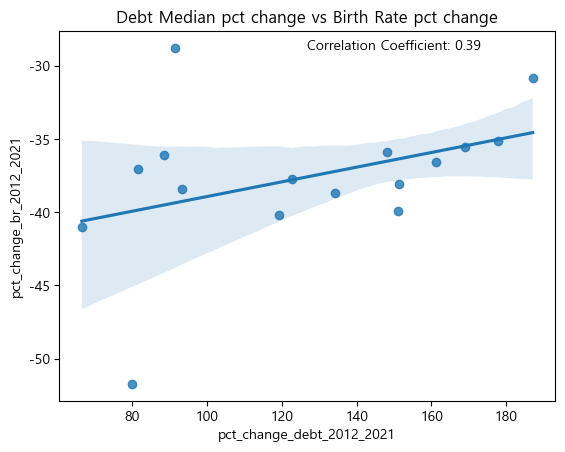

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.regplot(x='pct_change_debt_2012_2021', y='pct_change_br_2012_2021', data=merged_df2)
ax.set_title('Debt Median pct change vs Birth Rate pct change')

# Add correlation coefficient to plot
corr_coeff = merged_df2['pct_change_debt_2012_2021'].corr(merged_df2['pct_change_br_2012_2021'])
ax.annotate(f"Correlation Coefficient: {corr_coeff:.2f}", xy=(0.5, 0.95), xycoords='axes fraction')

# Show the plot
plt.show()





In [159]:

import numpy as np

corr = np.corrcoef(merged_df2['pct_change_debt_2012_2021'], merged_df2['pct_change_br_2012_2021'])[0, 1]
corr

0.39489372051025534

In [97]:
df3 = pd.read_excel("C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-21 - 복사본\\jsy\\12-21증감율_출산율.xlsx ", index_col = [0, 1], header = 0)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-21 - 복사본\\jsy\\12-21증감율_출산율.xlsx '

In [ ]:
df3

In [ ]:
df4 = pd.read_excel("C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-21 - 복사본\\jsy\\시도별_부채_현황_증감률_18-21.xlsx", index_col = [0, 1], header = 0)

In [ ]:
df4

In [ ]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df5 = pd.concat([df3, df4], axis = 1)

In [ ]:
from IPython.display import display
display(df5)


In [ ]:
ax = sns.regplot(x = df5['부채 증감율'], y = df5['출산율 증감율'])
ax.set_xlabel("debt pct change")
ax.set_ylabel("birth rate pct change")

In [ ]:

import numpy as np

corr = np.corrcoef(df5['부채 증감율'], df5['출산율 증감율'])[0, 1]
corr

# TOPIC 4: MEN AND WOMEN AGE AT FIRST MARRIAGE


In [167]:
import pandas as pd

# read in the two csv files



fm0021 = pd.read_excel('C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-21 - 복사본\\jsy\\04-24\\WIFE_평균_초혼연령_시도_시_군_구_0021.xlsx', index_col = [0, 1], header = 0)



br0021 = pd.read_excel('C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-21 - 복사본\\jsy\\04-24\\합계출산율_시도_시_군_구__0021.xlsx', index_col = [0, 1], header = 0)




# set '시도별' as the index for each dataframe
# df1.set_index('시도별', inplace=True)
# df2.set_index('시도별', inplace=True)


# merge the two dataframes on the index
#merged_df = pd.merge(df1, df2, left_index=True, right_index=True)

# print the merged dataframe
#print(merged_df)
#merged_df.info()







In [168]:
df6 = pd.concat([fm0021, br0021], axis = 1)


In [169]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

Text(31.91, 1.783, 'r = -0.58')

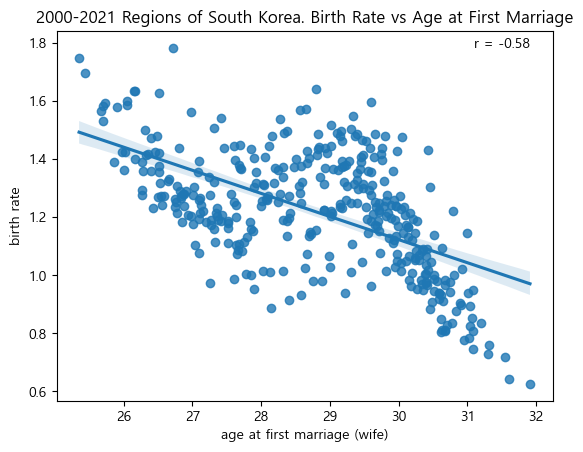

In [170]:
ax = sns.regplot(x = df6['아내 초혼연령'], y = df6['합계출산율'])
ax.set_title("2000-2021 Regions of South Korea. Birth Rate vs Age at First Marriage")
ax.set_xlabel("age at first marriage (wife)")
ax.set_ylabel("birth rate")

corr_coeff, _ = pearsonr(df6['아내 초혼연령'],df6['합계출산율'])
plt.annotate(f"r = {corr_coeff:.2f}", xy=(max(df6['아내 초혼연령']), max(df6['합계출산율'])), ha='right')


In [171]:

corr = np.corrcoef(df6['아내 초혼연령'], df6['합계출산율'])[0, 1]
corr

-0.5765451098881966

In [172]:
import pandas as pd

# read in the two csv files
hfm0021 = pd.read_excel('C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-21 - 복사본\\jsy\\04-24\\HUS_평균_초혼연령_시도_시_군_구_0021.xlsx', index_col = [0, 1], header = 0)
br0021 = pd.read_excel('C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-21 - 복사본\\jsy\\04-24\\합계출산율_시도_시_군_구__0021.xlsx', index_col = [0, 1], header = 0)

# set '시도별' as the index for each dataframe
# df1.set_index('시도별', inplace=True)
# df2.set_index('시도별', inplace=True)


# merge the two dataframes on the index
#merged_df = pd.merge(df1, df2, left_index=True, right_index=True)

# print the merged dataframe
#print(merged_df)
#merged_df.info()

In [173]:
hfm0021

남편 초혼연령
시점   시군구별            
2000 전국         29.28
     서울특별시      29.65
     부산광역시      29.43
     대구광역시      29.10
     인천광역시      29.21
...               ...
2021 전라북도       33.35
     전라남도       33.46
     경상북도       33.23
     경상남도       33.21
     제주특별자치도    33.51

[374 rows x 1 columns]

In [174]:
df7 = pd.concat([hfm0021, br0021], axis = 1)


In [175]:
df7


남편 초혼연령  합계출산율
시점   시군구별                   
2000 전국         29.28  1.480
     서울특별시      29.65  1.275
     부산광역시      29.43  1.235
     대구광역시      29.10  1.378
     인천광역시      29.21  1.473
...               ...    ...
2021 전라북도       33.35  0.850
     전라남도       33.46  1.017
     경상북도       33.23  0.966
     경상남도       33.21  0.903
     제주특별자치도    33.51  0.951

[374 rows x 2 columns]

Text(34.04, 1.783, 'r = -0.52')

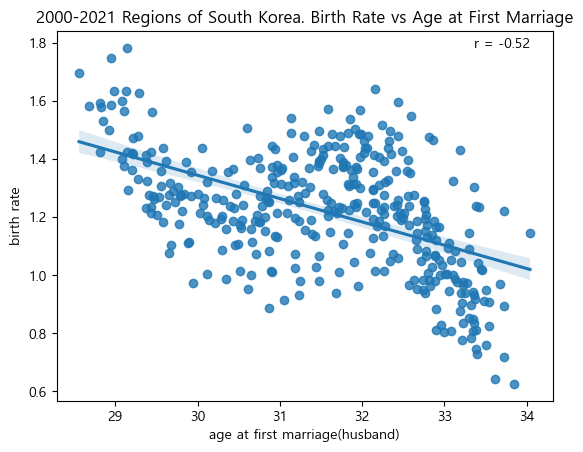

In [176]:
ax = sns.regplot(x = df7['남편 초혼연령'], y = df7['합계출산율'])
ax.set_title("2000-2021 Regions of South Korea. Birth Rate vs Age at First Marriage")
ax.set_xlabel("age at first marriage(husband)")
ax.set_ylabel("birth rate")


corr_coeff, _ = pearsonr(df7['남편 초혼연령'],df7['합계출산율'])
plt.annotate(f"r = {corr_coeff:.2f}", xy=(max(df7['남편 초혼연령']), max(df7['합계출산율'])), ha='right')

In [177]:

corr = np.corrcoef(df7['남편 초혼연령'], df7['합계출산율'])[0, 1]
corr



-0.5203739544929626

In [178]:
df6.to_excel("C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-21 - 복사본\\jsy\\df6.xlsx")

In [179]:
df7.to_excel('C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-21 - 복사본\\jsy\\df7.xlsx')
